In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn import datasets
import scipy as sp                                                         
import scipy.stats as stats
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression
import math
from sklearn import model_selection
from sklearn.metrics import make_scorer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Criando um dicionário com as métricas.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score)}

# **2 QUESTÃO**

#Intervalo de Confiança

*   Criação da função de Intervalo de confiança para 95%. A função é executada para todo os classificadores e executada depois da validação cruzada.
*   Com a métrica de error não tinha pré-definida foi feita o cálculo: 1- acurácia.
*   O resultado mostra todos os valores para as métricas: error, f1, precision e recall e a sua média.


In [ ]:

def confidence_intervals(resuls_metrics):

  data_conf_inter = pd.DataFrame.from_dict(resuls_metrics)
  data_conf_inter['test_error_rate'] =  1 - data_conf_inter['test_accuracy']

  size_pop = previsores.shape[0]
  z_critical = stats.norm.ppf(q = 0.95)  # z-critical valor


  error_rate_mean = data_conf_inter['test_error_rate'].mean()
  error_rate_std = data_conf_inter['test_error_rate'].std()
  precision_mean = data_conf_inter['test_precision'].mean()
  precions_std = data_conf_inter['test_precision'].std()
  f1_mean = data_conf_inter['test_f1'].mean()
  f1_std = data_conf_inter['test_f1'].std()
  recall_mean = data_conf_inter['test_recall'].mean()
  recall_std = data_conf_inter['test_recall'].std()

  metrics = {'error_rate':None, 'precision':None, 'recall':None, 'f1':None}

  error_rate_margin = z_critical * (error_rate_std/math.sqrt(size_pop))
  error_rate_conf_interv = (error_rate_mean - error_rate_margin, error_rate_mean + error_rate_margin)
  metrics['error_rate'] = {'mean': error_rate_mean, 'conf_inter': error_rate_conf_interv}

  precision_margin = z_critical * (precions_std/math.sqrt(size_pop))
  precision_conf_interv = (precision_mean - precision_margin, precision_mean + precision_margin)
  metrics['precision'] = {'mean': precision_mean, 'conf_inter': precision_conf_interv}

  f1_margin = z_critical * (f1_std/math.sqrt(size_pop))
  f1_conf_interv = (f1_mean - f1_margin, f1_mean + f1_margin)
  metrics['f1'] = {'mean': f1_mean, 'conf_inter': f1_conf_interv}

  recall_margin = z_critical * (recall_std/math.sqrt(size_pop))
  recall_conf_interv = (recall_mean - recall_margin, recall_mean + recall_margin)
  metrics['recall'] = {'mean': recall_mean, 'conf_inter': recall_conf_interv}


  return metrics;


# Classificador bayesiano gaussiano: considere a seguinte regra de decisão: afetar o exemplo **x**k à classe ωl se P(ωl
|xk ) = 2
max
i=1
P(ωi
|xk
) com P(ωi
|xk
) = p(xk
|ωi
)P(ωi
)
Pc
r=1
p(xk
|ωr )P(ωr )
(1 ≤ l ≤ 2)



*   Procedimento de normalização dos dados com MinMax
*   Definição dos valores para média e variância ao longo dos indices com suavização da variância
*   Captação dos valores de probabilidade a priori
*   Utilização da multivariada normal com log da função densidade de probabilidade
*   Soma dos logs, com a obtenção da probabilidade a posteriori




In [ ]:
!pip install utils

In [ ]:
import numpy as np
from utils import *
from datetime import datetime
from scipy.stats import norm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_validate
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
  
    def __init__(self,verbose=False):
        self.verbose = verbose

    def fit(self, X, Y, smoothing=10e-3):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)
        

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in self.gaussians.items():
            # print "c:", c
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)



In [ ]:
if __name__ == '__main__':
    dataset = pd.read_csv('/content/drive/MyDrive/AM/Projeto AM/data_banknote_authentication_teste.csv', header=None)

    normalizer = MinMaxScaler(feature_range=(0.00001, 1.00001 ))
    normalizer.fit(dataset.iloc[:, :-1])
    df = pd.DataFrame(dataset)
    normalizer.fit(df)
    df_normalizer=normalizer.transform(df)

    #Separação dos dados para os previsores e classe, já normalizados
    previsores = df_normalizer[:,0:4]
    classes = dataset.iloc[:,4]
    
    Ntrain = len(classes) / 2 

    #Separação de 80% treinamento, 20% teste com os dados já normalizados e estratitificados
    previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores, classes, test_size=0.2, random_state=42, stratify=classes)
    

    NB = NaiveBayes()
    t0 = datetime.now()
    NB.fit(previsores_train, classe_train)
    print ("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print ("Train accuracy:", NB.score(previsores_train, classe_train))
    print ("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(classe_train))

    t0 = datetime.now()
    print ("Test accuracy:", NB.score(previsores_test, classe_test))
    print ("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(classe_test))

Training time: 0:00:00.038368
Train accuracy: 0.837739288969918
Time to compute train accuracy: 0:00:00.040036 Train size: 1097
Test accuracy: 0.8545454545454545
Time to compute test accuracy: 0:00:00.001604 Test size: 275


In [ ]:
predict_NB = NB.predict(previsores_test)


In [ ]:
skf = StratifiedKFold(n_splits=10)
validation_nbclassifier = cross_validate(NB, previsores, classes, cv=skf, scoring=meus_scores) 
confidence_intervals(validation_nbclassifier)


{'error_rate': {'conf_inter': (0.15945544822871388, 0.16272798560181606),
  'mean': 0.16109171691526497},
 'f1': {'conf_inter': (0.8036035382218729, 0.8080673425064171),
  'mean': 0.805835440364145},
 'precision': {'conf_inter': (0.8606384504252516, 0.8634789995644292),
  'mean': 0.8620587249948404},
 'recall': {'conf_inter': (0.755723891759616, 0.7623088951256299),
  'mean': 0.759016393442623}}

# Treine um classificador bayesiano baseados em k-vizinhos. Normalize os dados e use a distância Euclidiana para definir a vizinhança. Use conjunto de validação para fixar o o número de vizinhos k.


*  Para o KNN nessa questão foi feito a normalização dos dados com MinMax para que os valores fiquem no intervalo de [0,1].
*   Foi realizado a separação do conjunto de treinamento, validação e teste, onde ficou: 80% treinamento, 20% teste e para a validação foi 20% retirado dos 80% de treinamento.
*  Para a escolha do valor de vizinhos foi utilizado o conjunto de validação e feito GridSearch com o objetivo de buscar o melhor valor. Além disso, a métrica de distância utilizada foi a Euclidiana.
* O melhor valor foi o de: 1 vizinho com o valor de acurácia 0.9964285714285716.
* Teve 100% de positivo com a Matriz de confusão.





In [ ]:
#dataset = pd.read_csv('/content/BankNote_Authentication.csv')
dataset = pd.read_csv('/content/drive/MyDrive/AM/Projeto AM/data_banknote_authentication_teste.csv', header=None)
dataset.shape[0]

1372

In [ ]:
#Normalização dos dados
normalizer = MinMaxScaler(feature_range=(0.00001, 1.00001 ))
normalizer.fit(dataset.iloc[:, :-1])
df = pd.DataFrame(dataset)
normalizer.fit(df)
df_normalizer=normalizer.transform(df)



In [ ]:
#Separação dos dados para os previsores e classe, já normalizados
previsores = df_normalizer[:,0:4]
classes = dataset.iloc[:,4]


In [ ]:
#Separação de 80% treinamento, 20% teste com os dados já normalizados e estratitificados
previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores, classes, test_size=0.2, random_state=42, stratify=classes)

#O conjunto de validação 20% foi retirado do conjunto de treinamento 
previsores_train_x, previsores_valida, classe_train_y, classe_valida = train_test_split(previsores_train, classe_train, test_size=0.25, random_state=42, stratify=classe_train)


In [ ]:
#Criação do classificador KNN
knn = KNeighborsClassifier()
metric_distance = ['euclidean']
# Definindo a lista de valores.
k_list = list(range(1,30))
# Colocamos os valores em um dicionário
parametros = dict(n_neighbors=k_list, metric=metric_distance)

In [ ]:
#Instanciando o objeto GridSearch:
grid_classifier = GridSearchCV(knn, parametros, cv=10)
grid_classifier.fit(previsores_valida,classe_valida)
scores = grid_classifier.cv_results_['mean_test_score']
scores

array([0.9962963 , 0.9962963 , 0.9962963 , 0.9962963 , 0.9962963 ,
       0.99259259, 0.9962963 , 0.9962963 , 0.99272487, 0.99272487,
       0.99272487, 0.9962963 , 0.99272487, 0.99272487, 0.99272487,
       0.98902116, 0.98915344, 0.98187831, 0.98915344, 0.98187831,
       0.98558201, 0.98187831, 0.98558201, 0.98915344, 0.98187831,
       0.98558201, 0.98187831, 0.98187831, 0.97830688])

In [ ]:
#Salvando o valor para o melhor valor da quantidade de vizinhos
best_k= grid_classifier.best_params_.get('n_neighbors')
print("Melhores parametros {} com o valor de acurácia {} ".format(grid_classifier.best_params_,grid_classifier.best_score_))

Melhores parametros {'metric': 'euclidean', 'n_neighbors': 1} com o valor de acurácia 0.9962962962962963 


In [ ]:
#Executando o classificador baseado com o valor da quantidade de melhor vizinho
knn=KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='euclidean')

In [ ]:
#Validação Cruzada com 10 folds
validation_knn = cross_validate(knn, previsores, classes, cv=10, scoring=meus_scores)
confidence_intervals(validation_knn)

{'error_rate': {'conf_inter': (0.0013231855326312225, 0.0015965224965658541),
  'mean': 0.0014598540145985383},
 'f1': {'conf_inter': (0.998221759495695, 0.9985262079839798),
  'mean': 0.9983739837398374},
 'precision': {'conf_inter': (0.9964722002898465, 0.9970761868069278),
  'mean': 0.9967741935483871},
 'recall': {'conf_inter': (1.0, 1.0), 'mean': 1.0}}

In [ ]:
#Realizar o treinamento do classificador
knn.fit(previsores_train, classe_train)

#Previsão para os testes
predict_knn = knn.predict(previsores_test)
score_KNN=knn.score(previsores_test,classe_test)
print(score_KNN)


1.0


In [ ]:
#Matriz de confusão
confusao = confusion_matrix(classe_test,predict_knn)

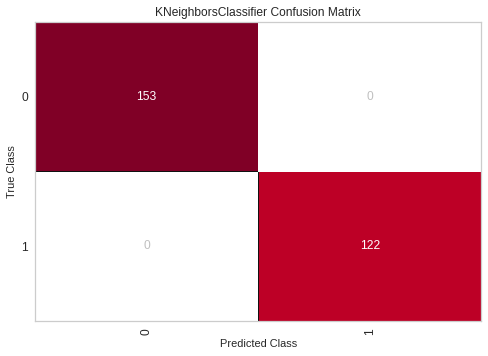

In [ ]:
#Gráfico da Matriz de Confusão
v = ConfusionMatrix(knn)
v.fit(previsores_train, classe_train)
v.score(previsores_test,classe_test)
v.poof()

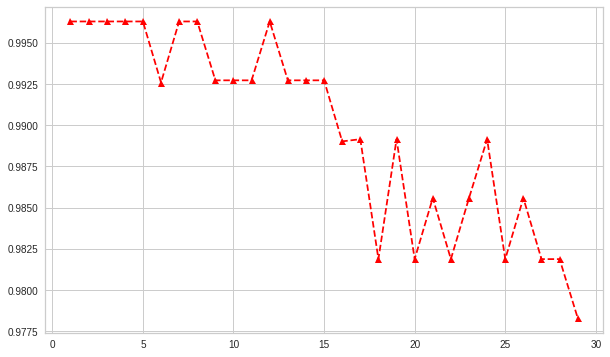

In [ ]:
#Plot do Gráfico melhor Nº de vizinhos.
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='^')

#Treine um classificador bayesiano baseado em janela de Parzen. Use a função de kernel multivariada produto com um mesmo h para todas as dimensões e a função de kernel Gaussiana unidimensional. Use o conjunto de validação para fixar o parâmetro h

In [ ]:
from random import randrange
from math import sqrt
from math import exp
from math import pi
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
class hero(BaseEstimator, ClassifierMixin):
  def __init__(self, bandwidth=1.0, kernel='gaussian'):
      self.bandwidth = bandwidth
      self.kernel = kernel
  
  def fit(self, X, y):
      self.classes_ = np.sort(np.unique(y))
      training_sets = [X[y == yi] for yi in self.classes_]
      self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
      self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
      return self
  def predict_proba(self, X):
      logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
      result = np.exp(logprobs + self.logpriors_)
      return result / result.sum(1, keepdims=True)
        
  def predict(self, X):
      return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [ ]:
nbparzen=hero()

In [ ]:
predicao = nbparzen.fit(previsores_train, classe_train).predict(previsores_valida)


{'bandwidth': 0.1}
accuracy = 0.9963636363636363


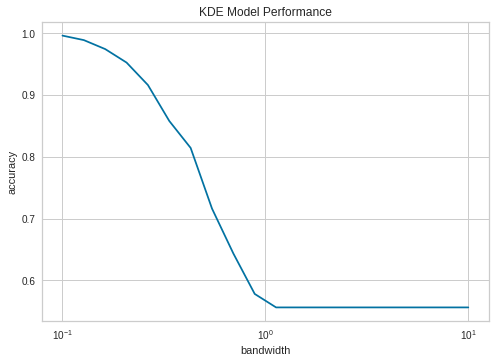

In [ ]:
bandwidths = np.logspace(-1, 1, 20)
param_grid = [{'bandwidth': bandwidths}]
gauss = GridSearchCV(nbparzen, param_grid)
gauss.fit(previsores_valida, classe_valida)

gauss.cv_results_
scores = [x for x in gauss.cv_results_['mean_test_score']]

plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(gauss.best_params_)
print('accuracy =', gauss.best_score_)

In [ ]:
nbparzenHero = hero(gauss.best_params_['bandwidth'])

In [ ]:
validation_parzen = cross_validate(nbparzenHero, previsores, classes, cv=10, scoring=meus_scores)
confidence_intervals(validation_parzen)


{'error_rate': {'conf_inter': (0.008461262036759908, 0.00905698613842255),
  'mean': 0.00875912408759123},
 'f1': {'conf_inter': (0.9899805166434457, 0.9906384185781645),
  'mean': 0.9903094676108051},
 'precision': {'conf_inter': (0.9802539782526453, 0.9815483770980972),
  'mean': 0.9809011776753712},
 'recall': {'conf_inter': (1.0, 1.0), 'mean': 1.0}}

In [ ]:
predict_parzen=nbparzen.predict(previsores_test)

#Treine um classificador baseado em regressão logistica com os 4 atributos numericos x1; x2; x3; x4

* Foi feito Regressão logística com os 4 atributos sem definir regularização.
* A não regularização foi determinada com no parâmetro penalty o valor "none".
* O seu valor para o score na predição ficou 0.9854545454545455, um pouco menor que o valor do KNN.
* A sua matriz de confusão errou somente 4 valores. 

In [ ]:
#Criação do classificador e execução da validação cruzada. Sem regularização. O valor do parâmetro penalty como NONE indica sem regularização.
regression_log = LogisticRegression(penalty='none', random_state=0)
validation_regressionLog = cross_validate(regression_log, previsores, classes, cv=10, scoring=meus_scores)
confidence_intervals(validation_regressionLog)


{'error_rate': {'conf_inter': (0.01117499214238161, 0.012150936134355908),
  'mean': 0.011662964138368759},
 'f1': {'conf_inter': (0.9863413100857011, 0.987439961718282),
  'mean': 0.9868906359019916},
 'precision': {'conf_inter': (0.9849220641623398, 0.9866907357529454),
  'mean': 0.9858063999576426},
 'recall': {'conf_inter': (0.9875509195802599, 0.9894982607476088),
  'mean': 0.9885245901639343}}

In [ ]:
#Treinamento do modelo e predição com os dados de teste.
regression_log.fit(previsores_train, classe_train)
predict_rl = regression_log.predict(previsores_test)


In [ ]:
score_RL=regression_log.score(previsores_test,classe_test)
print(score_RL)

0.9854545454545455


In [ ]:
#Matriz de Confusão
confusao_rl = confusion_matrix(classe_test,predict_rl)
confusao_rl

array([[149,   4],
       [  0, 122]])

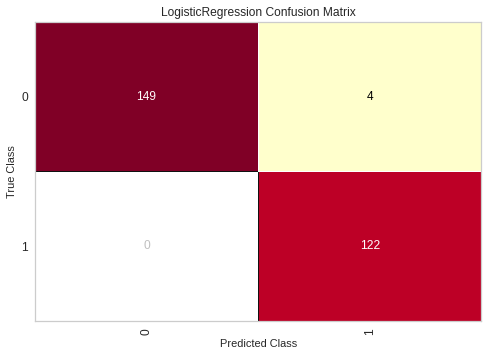

In [ ]:
#Gráfico da Matriz de Confusão
v = ConfusionMatrix(regression_log)
v.fit(previsores_train, classe_train)
v.score(previsores_test,classe_test)
v.poof()

#Treine um classificador baseado em regressão logistica com os 4 atributos numericos x1; x2; x3; x4 originais e mais 4 atributos suplementares x5 = x²1; x6 =x2^1/2; x7 = log(x3); x8 = 1/x4. Use regularização. Use conjunto de validação para fixar o parâmetro de regularização.

* A questão anterior eram somente 4 atributos, para esse caso foi necessário a criação de mais 4 colunas(x5, x6, x7 e x8) para a execução do classificador.

* Para esse caso de Regressão Logística foi necessário a regularização.

*  Semelhante ao problema do KNN, foi utilizado o conjunto de validação para determinar qual seria o melhor valor de regularização.

* Neste caso os dois parâmetros que foram testados foi o C e penalty, onde os melhores valores encontrados para ambos, consecutivamente, foi:  268.2695795279727 e l2.

* Nessas configurações essa regressão logística se comportou um pouco inferior a anterior, tendo um valor de 0.9818181818181818 e errando 5 valores na matriz de confusão.



In [ ]:
#Criaçao do DataFrame e nomeação das colunas para a inclusão dos novos atributos
df = pd.DataFrame(previsores)
df.rename(columns={0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4'}, inplace = True)


In [ ]:
#função para adicionar as 4 colunas dos atributos suplementares
def new_attribute(X):
  colum_X= X.copy()
  colum_X['x5'] = df.apply(lambda row: row.x1**2, axis=1)
  colum_X['x6'] = df.apply(lambda row: row.x2**(1/2), axis=1)
  colum_X['x7'] = df.apply(lambda row: math.log(row.x3), axis=1)
  colum_X['x8'] = df.apply(lambda row: 1/row.x4, axis=1)

  normalizer = MinMaxScaler(feature_range=(0.00001, 1.00001 ))
  colum_X[['x5', 'x6', 'x7', 'x8']] = normalizer.fit_transform(colum_X[['x5', 'x6', 'x7', 'x8']]) 
  return colum_X

In [ ]:
#Criação do DF para a nova configuração.
new_attr = new_attribute(df)
new_attr

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.769014,0.839653,0.106793,0.736638,0.591381,0.916066,0.805718,0.000014
1,0.835669,0.820992,0.121814,0.644336,0.698339,0.905794,0.817149,0.000016
2,0.786639,0.416658,0.310618,0.786961,0.618798,0.644373,0.898455,0.000013
3,0.757115,0.871709,0.054931,0.450450,0.573222,0.933449,0.747972,0.000022
4,0.531588,0.348672,0.424672,0.687372,0.282590,0.589193,0.925620,0.000015
...,...,...,...,...,...,...,...,...
1367,0.537134,0.565865,0.165259,0.726408,0.288517,0.751460,0.843642,0.000014
1368,0.407700,0.332878,0.506763,0.808360,0.166226,0.575621,0.940970,0.000012
1369,0.237395,0.011778,0.985613,0.524765,0.056365,0.105709,0.998750,0.000019
1370,0.250852,0.201711,0.761597,0.660685,0.062935,0.447383,0.976354,0.000015


In [ ]:
# Hiperparâmetros C e penalty para tunnning
c_space = np.logspace(-5, 8, 15)
param_rl = {'C': c_space, 'penalty': ['l1', 'l2']}


In [ ]:
#Junção dos novos atributos no conjunto de validação para escolha do melhor parâmetro.
df_valida = pd.DataFrame(previsores_valida)
df_valida.rename(columns={0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4'}, inplace = True)
valida_newattr = new_attribute(df_valida)


In [ ]:
#Verificação do melhor parâmetro C e penaty com Grid no conjunto de validação
regre_log2 = LogisticRegression()
regre_log2_cv = GridSearchCV(regre_log2, param_rl, cv=10)
regre_log2_cv.fit(valida_newattr, classe_valida)
regre_log2_cv.best_params_

In [ ]:
#Salvando os melhores parâmetros
best_C= regre_log2_cv.best_params_.get('C')
best_penalty = regre_log2_cv.best_params_.get('penalty')
regre_log2 = LogisticRegression(random_state=0, C=best_C, penalty=best_penalty)


In [ ]:
#Validação Cruzada com 10 folds
validation_reglog2 = cross_validate(regre_log2, new_attr, classes, cv=10, scoring=meus_scores)
confidence_intervals(validation_reglog2)


{'error_rate': {'conf_inter': (0.002028295168301507, 0.0023406882232144166),
  'mean': 0.002184491695757962},
 'f1': {'conf_inter': (0.9973865808294087, 0.9977353703901037),
  'mean': 0.9975609756097562},
 'precision': {'conf_inter': (0.9948153135809233, 0.9955072670642379),
  'mean': 0.9951612903225806},
 'recall': {'conf_inter': (1.0, 1.0), 'mean': 1.0}}

In [ ]:
#Realizar o treinamento do classificador
df_train = pd.DataFrame(previsores_train)
df_train.rename(columns={0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4'}, inplace = True)
new_attr_train = new_attribute(df_train)
regre_log2.fit(new_attr_train, classe_train)


LogisticRegression(C=268.2695795279727, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Previsão para os testes
df_test = pd.DataFrame(previsores_test)
df_test.rename(columns={0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4'}, inplace = True)
new_attr_test = new_attribute(df_test)

predict_rL2 = regre_log2.predict(new_attr_test)
score_RL=regre_log2.score(new_attr_test,classe_test)
print(score_RL)

0.9818181818181818


In [ ]:
#Matriz de Confusão
confusao_RL = confusion_matrix(classe_test,predict_rL2)
confusao_RL

array([[148,   5],
       [  0, 122]])

#Treine um classificador usando a regra do voto majoritario usando os classificadores i) a v)

* Nesse caso foi feito um ensemble com os outros classificadores para tentar verificar o desempenho.
* A votação hard que foi utilizada envolve somar as previsões para cada rótulo de classe e prever o rótulo de classe com mais votos. 

In [ ]:
from sklearn.ensemble import  VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn import model_selection



In [ ]:
#Função que cria o sistema de votação
def get_vote():
    models = list()
    models.append(('Naive', NB))
    models.append(('knn', knn))
    models.append(('lr1', regression_log))
    models.append(('lr2', regre_log2))
    models.append(('parzen', nbparzenHero))
    # Define o voto ensembles
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

In [ ]:
#Retorna os modelos
def get_models():
      models = dict()
      models['Naive'] = NB
      models['knn'] = knn
      models['lr1'] = regression_log
      models['lr2'] = regre_log2
      models['parzen'] = nbparzenHero
      models['ensemble'] = get_vote()
      return models



In [ ]:
#Executa os modelos com validação cruzada 10-folds
def evaluate_model(model, X, y):
    cross_ensemble = cross_validate(model, X, y, cv=10, scoring=meus_scores)
    return cross_ensemble

In [ ]:
#Executa os modelos e separa RL2, devido a quantidade de atributos diferentes.
results, names = list(), list()
models = get_models()
for name, model in models.items():
    if name == 'lr2':
      scores = evaluate_model(model, new_attr, classes)
      results.append(scores)
      names.append(name)
      print("Classificador", name)
      print(confidence_intervals(scores))
    elif name == 'ensemble':
      validation_ensemble = evaluate_model(model, previsores, classes)
      results.append(validation_ensemble)
      names.append(name)
      print("Classificador", name)
      print(confidence_intervals(validation_ensemble))
      data_conf_ensemble = pd.DataFrame.from_dict(validation_ensemble)
    else:
      scores = evaluate_model(model, previsores, classes)
      results.append(scores)
      names.append(name)
      print("Classificador", name)
      print(confidence_intervals(scores)) 

Classificador Naive
{'error_rate': {'mean': 0.16109171691526497, 'conf_inter': (0.15945544822871388, 0.16272798560181606)}, 'precision': {'mean': 0.8620587249948404, 'conf_inter': (0.8606384504252516, 0.8634789995644292)}, 'recall': {'mean': 0.759016393442623, 'conf_inter': (0.755723891759616, 0.7623088951256299)}, 'f1': {'mean': 0.805835440364145, 'conf_inter': (0.8036035382218729, 0.8080673425064171)}}
Classificador knn
{'error_rate': {'mean': 0.0014598540145985383, 'conf_inter': (0.0013231855326312225, 0.0015965224965658541)}, 'precision': {'mean': 0.9967741935483871, 'conf_inter': (0.9964722002898465, 0.9970761868069278)}, 'recall': {'mean': 1.0, 'conf_inter': (1.0, 1.0)}, 'f1': {'mean': 0.9983739837398374, 'conf_inter': (0.998221759495695, 0.9985262079839798)}}
Classificador lr1
{'error_rate': {'mean': 0.011662964138368759, 'conf_inter': (0.01117499214238161, 0.012150936134355908)}, 'precision': {'mean': 0.9858063999576426, 'conf_inter': (0.9849220641623398, 0.9866907357529454)}, 

In [ ]:
#Cria uma lista com os modelos para o treinamento
models_train= list()
models_train.append(('Naive', NB))
models_train.append(('knn', knn))
models_train.append(('lr1', regression_log))
models_train.append(('lr2', regre_log2))
models_train.append(('parzen', nbparzenHero))
models_train


[('Naive', NaiveBayes(verbose=False)),
 ('knn',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                       weights='distance')),
 ('lr1',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='none',
                     random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('lr2', LogisticRegression(C=268.2695795279727, class_weight=None, dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('parzen', hero(bandwidth=0.1, kernel='gaussian'))]

In [ ]:
#Treina cada modelo e exibe o Score
ensemble_train = VotingClassifier(estimators=models_train, voting='hard')
ensemble_train.fit(previsores_train, classe_train)
predict_ensemble = ensemble_train.predict(previsores_test)
score_ensemble= ensemble_train.score(previsores_test, classe_test)
score_ensemble


0.9854545454545455

In [ ]:
#Matriz de Confusão
confusao_ensemble = confusion_matrix(classe_test,predict_ensemble)
confusao_ensemble

array([[149,   4],
       [  0, 122]])

# Friedman Test

In [ ]:
# Configuração dos vetores para executar o Friedman Test
data_conf_naive = pd.DataFrame.from_dict(validation_nbclassifier)
data_conf_reglog = pd.DataFrame.from_dict(validation_reglog2)
data_conf_knn = pd.DataFrame.from_dict(validation_knn)
data_conf_parzen = pd.DataFrame.from_dict(validation_parzen)
data_conf_reglog2 = pd.DataFrame.from_dict(validation_reglog2)

f_naive = data_conf_naive
f_knn=data_conf_knn.values
f_reglog=data_conf_reglog.values
f_parzen=data_conf_parzen.values
f_reglo2 = data_conf_reglog2.values
f_ensemble = data_conf_ensemble.values


* A suposição padrão, ou hipótese nula, é que as várias amostras emparelhadas têm a mesma distribuição. Uma rejeição da hipótese nula indica que uma ou mais das amostras emparelhadas tem uma distribuição diferente.

* Falha ao rejeitar H0: As distribuições de amostras emparelhadas são iguais.
Rejeitar H0: As distribuições de amostras emparelhadas não são iguais.

In [ ]:
# Friedman test
from scipy.stats import friedmanchisquare

# Comparação das amostras
stat, p = friedmanchisquare(f_naive,f_knn, f_reglog, f_parzen, f_reglo2, f_ensemble)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Nível de significância em 5%
alpha = 0.05
if p > alpha:
	print('Mesma distribuição (aceita H0)')
else:
	print('Diferente distribuições (rejeita H0)')

Statistics=-777.963, p=1.000
Mesma distribuição (aceita H0)


Cálculo do Error

In [ ]:
def error_rate_media(resuls_metrics):

  data_conf_inter = pd.DataFrame.from_dict(resuls_metrics)
  data_conf_inter['test_error_rate'] =  1 - data_conf_inter['test_accuracy']
  error_rate_mean = data_conf_inter['test_error_rate'].mean() 

  return error_rate_mean


Cálculo F1-Score

In [ ]:
def f1_media(resuls_metrics):

  data_conf_inter = pd.DataFrame.from_dict(resuls_metrics)
  f1_mean = data_conf_inter['test_f1'].mean()

  return f1_mean

 Cálculo Recall





In [ ]:
def recall_media(resuls_metrics):

  data_conf_inter = pd.DataFrame.from_dict(resuls_metrics)
  recall_mean = data_conf_inter['test_recall'].mean()

  return recall_mean

Cálculo Precision

In [ ]:
def precision_media(resuls_metrics):

  data_conf_inter = pd.DataFrame.from_dict(resuls_metrics)
  precision_mean = data_conf_inter['test_precision'].mean()

  return precision_mean

# Curva ROC

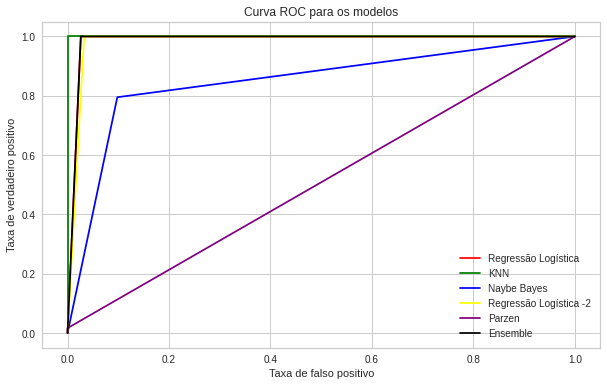

In [ ]:
plt.figure(figsize = (10,6))
fpr_reg, tpr_reg, limite1 = metrics.roc_curve(classe_test, predict_rl)
fpr_knn, tpr_knn, limite2 = metrics.roc_curve(classe_test, predict_knn)
fpr_nb, tpr_nb, limite3 = metrics.roc_curve(classe_test, predict_NB)
fpr_reg2, tpr_reg2, limite4 = metrics.roc_curve(classe_test, predict_rL2)
fpr_par, tpr_par, limite5 = metrics.roc_curve(classe_test, predict_parzen)
fpr_ense, tpr_ense, limite6 = metrics.roc_curve(classe_test, predict_ensemble)

plt.plot(fpr_reg, tpr_reg, color='red', label='Regressão Logística')
plt.plot(fpr_knn, tpr_knn, color='green', label='KNN')
plt.plot(fpr_nb, tpr_nb, color='blue', label='Naybe Bayes')
plt.plot(fpr_reg2, tpr_reg2, color='yellow', label='Regressão Logística -2')
plt.plot(fpr_par, tpr_par, color='purple', label='Parzen')
plt.plot(fpr_ense, tpr_ense, color='black', label='Ensemble')


plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC para os modelos')
plt.legend()
plt.show()

#Gráfico com as Métricas

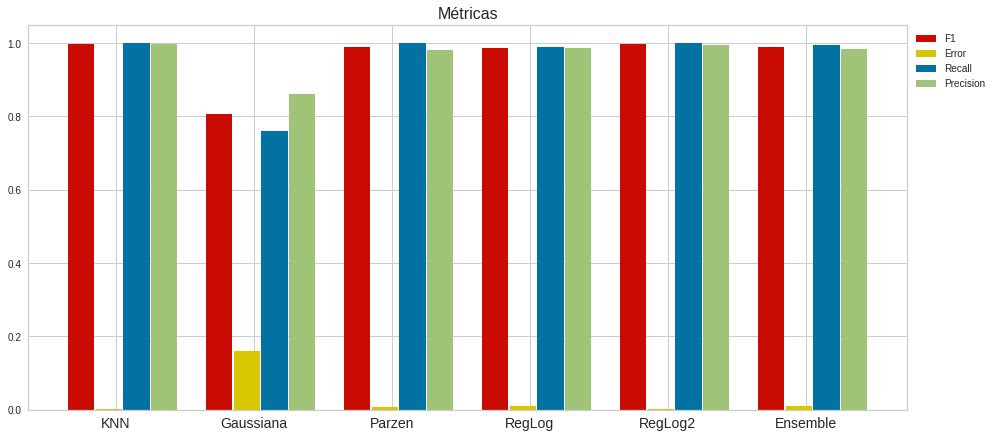

In [ ]:
# Gráfico para todos os classificadores

plt.figure(figsize = (14,6))

valores_F1 = [f1_media(validation_knn), f1_media(validation_nbclassifier),
           f1_media(validation_parzen), f1_media(validation_regressionLog),
           f1_media(validation_reglog2), f1_media(validation_ensemble)]
valores_error = [error_rate_media(validation_knn), error_rate_media(validation_nbclassifier),
           error_rate_media(validation_parzen), error_rate_media(validation_regressionLog),
           error_rate_media(validation_reglog2), error_rate_media(validation_ensemble)]
valores_recall = [recall_media(validation_knn), recall_media(validation_nbclassifier),
           recall_media(validation_parzen), recall_media(validation_regressionLog),
           recall_media(validation_reglog2), recall_media(validation_ensemble)]
valores_precision = [precision_media(validation_knn), precision_media(validation_nbclassifier),
           precision_media(validation_parzen), precision_media(validation_regressionLog),
           precision_media(validation_reglog2), precision_media(validation_ensemble)]


# Cria eixo x para os classificadores com uma separação de 0.2 entre as barras
x1 =  np.arange(len(valores_F1))
x2 = [x + 0.20 for x in x1]
x3 = [x + 0.20 for x in x2]
x4 = [x + 0.20 for x in x3]

# Plota as barras
plt.bar(x1, valores_F1, width=0.19, label = 'F1', color = 'r')
plt.bar(x2, valores_error, width=0.19, label = 'Error', color = 'y')
plt.bar(x3, valores_recall, width=0.19, label = 'Recall', color = 'b')
plt.bar(x4, valores_precision, width=0.19, label = 'Precision', color = 'g')

# coloca o nome dos classificadores como label do eixo x
classificadores = ['KNN', 'Gaussiana', 'Parzen', 'RegLog', 'RegLog2', 'Ensemble']
plt.xticks([x + 0.25 for x in range(len(x4))], classificadores, fontsize = 14)

# inseri uma legenda no gráfico
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.title("Métricas" , fontsize=16)
plt.show()